In [1]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [2]:
I_ZASILACZ = 1.00 * 10**(-3) #A
U_NIESYMETRYZACJI = -0.31 #mV dla Icewki =0
PODZIALKA_HALLA = 0.1 # A
d = 0.3 * 10**(-6) # m
e = 1.602 * 10**(-19) # C


# check unit of sigma
SIGMA = 30516.43192488263 # 1/(Ohm*m) 

In [3]:
df = pd.read_csv("in/dataI1.csv", names = ["I", "U mV"], header = 0)

In [4]:
df["U"] = df["U mV"] * 10**(-3) # V
df["B"] = 0.00673 + 0.18548 * df["I"] + 0.00217 * df["I"]**2 - 0.00318 * df["I"]**3 + 2.00009 * 10**(-4) * df["I"]**4

df["uI"] = typeB(PODZIALKA_HALLA, PODZIALKA_HALLA/2)
df["uU"] = 0.03/100*df["U"] + 0.01 * 10**(-3) # V
df["uB"] = (0.18548 + 2 * 0.00217 * df["I"] - 3 * 0.00318 * df["I"]**2 + 4* 2.00009 * 10**(-4) * df["I"]**3) * df["uI"]
df

,I,U mV,U,B,uI,uU,uB
0,0.0,-0.31,-0.00031,0.006730,0.06455,0.000010,0.011973
1,0.5,1.94,0.00194,0.099628,0.06455,0.000011,0.011965
2,1.0,4.18,0.00418,0.191400,0.06455,0.000011,0.011689
3,1.5,6.28,0.00628,0.280113,0.06455,0.000012,0.011182
4,2.0,8.54,0.00854,0.364130,0.06455,0.000013,0.010483
5,2.5,10.46,0.01046,0.442118,0.06455,0.000013,0.009631
6,3.0,12.51,0.01251,0.513041,0.06455,0.000014,0.008665
7,3.5,14.12,0.01412,0.576164,0.06455,0.000014,0.007624
8,4.0,15.37,0.01537,0.631052,0.06455,0.000015,0.006545
9,4.5,16.35,0.01635,0.677571,0.06455,0.000015,0.005469


In [5]:
a, b, ua, ub, chi2 = least_squares(df["U"], df["B"], df["uB"], 0, len(df.index)-1)

print("a = ", a, ", ua = ", ua)
print("b = ", b, ", ub = ", ub)
print("chi2 = ", chi2)

a =  39.91188087033584 , ua =  0.40929006942049523
b =  0.02177510354362861 , ub =  0.006285323733104895
chi2 =  76.29559580341153


In [6]:
Rh = d/a/I_ZASILACZ
uRh = d/I_ZASILACZ/a/a * ua

print("Rh = ", Rh, ", uRh = ", uRh)

Rh =  7.5165588155223326e-06 , uRh =  7.708113003752017e-08


In [7]:
# idk if i should take r or not, look at page nr 4
# przyjmujemy tylko jeden rodzaj nosnikow

n = 1/Rh/e
un = 1/e/Rh/Rh * uRh

print("n = ", n, ", un = ", un)

mu = SIGMA/n/e
umu = SIGMA/e /n/n * un

print("mu = ", mu, ", umu = ", umu)

n =  8.304594438272127e+23 , un =  8.516231157313675e+21
mu =  0.22937855540326363 , umu =  0.0023522410574830094


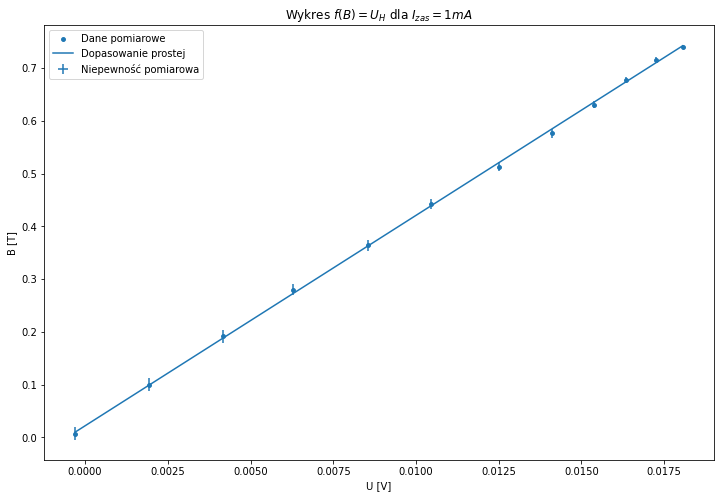

In [16]:
fig, ax = plt.subplots(figsize = (12, 8)) # add scienitfic notation for x axe
ax.scatter(df["U"], df["B"], label = "Dane pomiarowe", s=15)
ax.plot(df["U"], a*df["U"]+b, label = "Dopasowanie prostej")
ax.errorbar(df["U"], df["B"], xerr = df["uU"], yerr = df["uB"], fmt = "none", label = "Niepewność pomiarowa")
ax.set_title(r"Wykres $f(B)=U_H$ dla $I_{zas}=1mA$")
ax.set_xlabel("U [V]")
ax.set_ylabel("B [T]")
ax.legend(loc=2)

fig.savefig("out/bu.jpg", dpi = 800)
plt.show()